# 初始化

In [0]:
#@markdown - **挂载** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
# #@markdown - **卸载**
# !fusermount -u GoogleDrive

# 代码区

In [0]:
#@title 岭回归 { display-mode: "both" }
# ridge regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def mse_loss(theta, X, y, lamb): #均方差误差计算
	'''
	lamb: 正则化系数
	theta: (n+1)·1 矩阵, x0=1 为常数项 b
	X: m·(n+1) 矩阵,包含 x0
	'''
	y_f = np.dot(X, theta)
	theta_w = theta[1:]
	loss = 0.5 * mean_squared_error(y_f, y) + 0.5 * lamb * np.sum(np.square(theta_w))
	return loss

In [0]:
#@markdown - **样本数据的预处理**
data = np.array([[-2.95507616, 10.94533252],
				[-0.44226119, 2.96705822],
				[-2.13294087, 6.57336839],
				[1.84990823, 5.44244467],
				[0.35139795, 2.83533936],
				[-1.77443098, 5.6800407],
				[-1.8657203, 6.34470814],
				[1.61526823, 4.77833358],
				[-2.38043687, 8.51887713],
				[-1.40513866, 4.18262786]])
x = data[:, 0]
y = data[:, 1]
X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)
degree = 8    # 最高多项式阶数
num = 30    # 重构函数时的预测数据个数
theta = np.ones((degree+1, 1))
poly = PolynomialFeatures(degree, include_bias=False)
X_polyfeatures = poly.fit_transform(X)
X_with_x0 = np.c_[np.ones((X.shape[0],1)), X_polyfeatures]

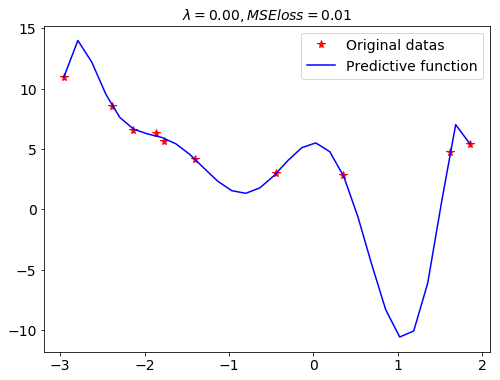

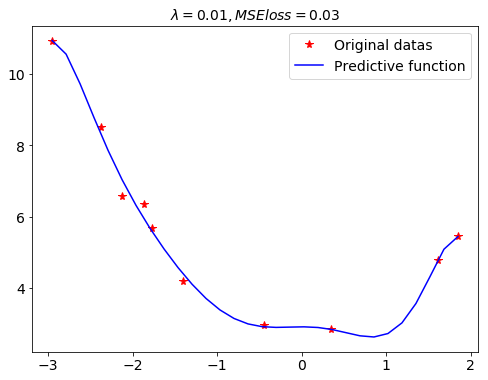

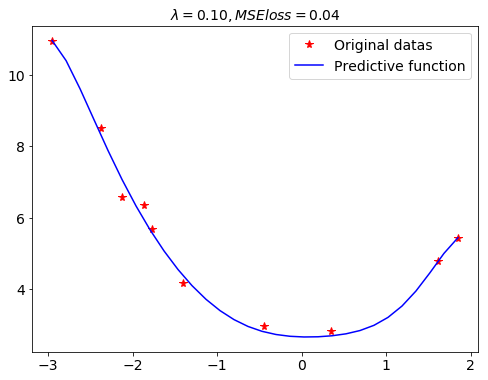

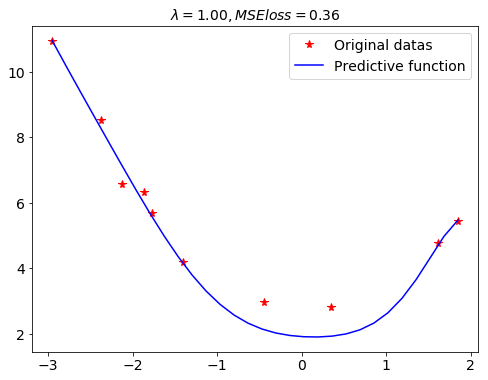

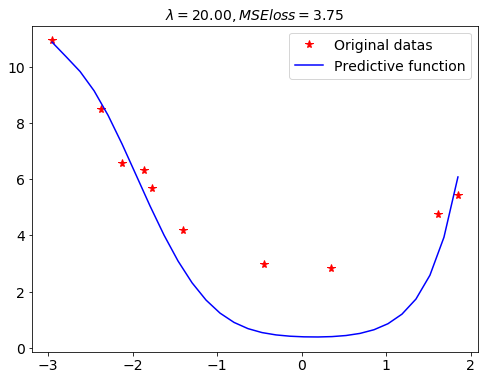


 Loss list:  [0.006134236315739817, 0.032901431270804055, 0.04404778592181912, 0.3600049579115132, 3.7518462069350145]


In [3]:
#@markdown - **训练模型**
Loss = []
lamb_set = [0., .01, 0.1, 1., 20]
for i, lamb_ridge in enumerate(lamb_set):
	first_half = np.linalg.inv((np.dot(X_with_x0.T,X_with_x0) + lamb_ridge*np.eye(degree+1)))
	sec_half = np.dot(X_with_x0.T, Y)
	theta_pre = np.dot(first_half, sec_half)
	if i == 0: theta0 = theta_pre
	y_train = np.dot(X_with_x0, theta_pre)    # 对训练数据预测
	
	x_pre = np.linspace(x.min(), x.max(), num)    # 在训练数据给出的范围生成更多用于预测的数据
	X_pre = x_pre.reshape(-1, 1)
	X_pre_polyfeatures = poly.fit_transform(X_pre)
	X_pre_with_x0 = np.c_[np.ones((X_pre.shape[0],1)), X_pre_polyfeatures]
	y_pre = np.dot(X_pre_with_x0, theta_pre)    # 对更多数据的预测y_pre

	loss = mse_loss(theta_pre, X_with_x0,Y, lamb_ridge)    # 对训练数据预测的mse_loss
	Loss.append(loss)

	#@markdown - **显示不同 lamb 下的拟合曲线**
	# print('When lamb is %.2f, mse_loss is: %.3f' %(lamb_ridge,loss))
	fig = plt.figure(i, figsize=(8, 6))
	ax = fig.add_subplot(1, 1, 1)
	ax.plot(x,y,'*r', markersize=8, label='Original datas')
	# ind_y = np.argsort(X_with_x0[:,1], axis=0)
	# ax.plot(np.sort(X_with_x0[:,1]), y_pre[ind_y], 'b', label='Predictive function')
	ax.plot(X_pre_with_x0[:,1], y_pre, 'b', label='Predictive function')
	ax.legend(loc='upper right', fontsize=14)
	ax.set_title(r'$\lambda = {0:.2f}, MSEloss = {1:.2f} $'.format(lamb_ridge,loss), fontsize=14)
	ax.tick_params(labelsize=14)
	# ax.set_ylabel('y', fontsize=14)
	# ax.set_title(r'$\lambda = {0:.2f}$'.format(lamb_ridge)+r'$, mse_{-}loss = {0:.2f}$'.format(loss), fontsize=14)
	plt.show()
	# print('When lamb is %.2f, mse_loss is: %.3f' %(lamb_ridge, loss))
print('\n','Loss list: ', Loss)